# MIE 1624 Introduction to Data Science and Analytics

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv(r'clean_kaggle_data.csv')
df.shape

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (285) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(15391, 370)

In [3]:
df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,484,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,655,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
7,11,1777,40-44,Man,Australia,Doctoral degree,Other,1-3 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14,852,45-49,Man,Nigeria,Master’s degree,Program/Project Manager,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15,838,22-24,Man,Nigeria,Bachelor’s degree,Other,< 1 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1
Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. Present 3 graphical figures that represent different trends in the data. For your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.

In [6]:
feature=df.iloc[:,[2,3,4,5,7,128]] 
feature.rename(columns = {'Q1':'Age',
                          'Q2':'Gender',
                          'Q3':'Country',
                          'Q4':'Education',
                          'Q6':'Professional Experience',
                          'Q25':'Salary'},
               inplace=True)
feature

,Age,Gender,Country,Education,Professional Experience,Salary
0,50-54,Man,India,Bachelor’s degree,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,20+ years,40000
4,45-49,Man,India,Doctoral degree,< 1 years,40000
5,30-34,Man,India,Bachelor’s degree,5-10 years,20000
6,30-34,Man,Turkey,I prefer not to answer,1-3 years,1000
7,40-44,Man,Australia,Doctoral degree,1-3 years,80000
8,45-49,Man,Nigeria,Master’s degree,5-10 years,3000
9,22-24,Man,Nigeria,Bachelor’s degree,< 1 years,1000


# 1.1 distribution of Salary

In [8]:
feature.describe()

,Salary
count,15391.000000
mean,49116.009356
std,98090.207788
min,1000.000000
25%,2000.000000
50%,15000.000000
75%,60000.000000
max,1000000.000000


Text(0.5, 0, 'Salary ($USD)')

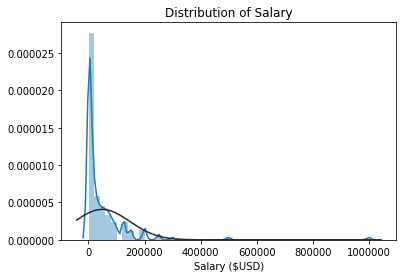

In [10]:
sns.distplot(feature['Salary'], fit=norm)
plt.title('Distribution of Salary')
plt.xlabel('Salary ($USD)')

Text(0.5, 1.0, 'Probability of Salary')

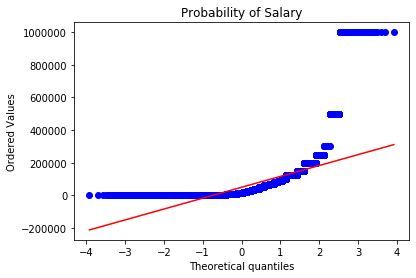

In [13]:
stats.probplot(feature['Salary'], plot=plt)
plt.title('Probability of Salary')

# 1.2 country vs. mean Salary

In [19]:
country_mean = feature.groupby('Country')['Salary'].mean()
country_mean_df = pd.DataFrame(country_mean)
country_mean_df.sort_values(by=['Salary'], ascending = True, inplace = True)
country_mean_df

,Salary
Country,
Ethiopia,4633.333333
Sri Lanka,5600.000000
Bangladesh,7479.310345
Iraq,8053.571429
Egypt,8175.438596
"Iran, Islamic Republic of...",8426.315789
Uganda,8666.666667
Ghana,9035.714286
Viet Nam,11090.322581


<BarContainer object of 66 artists>

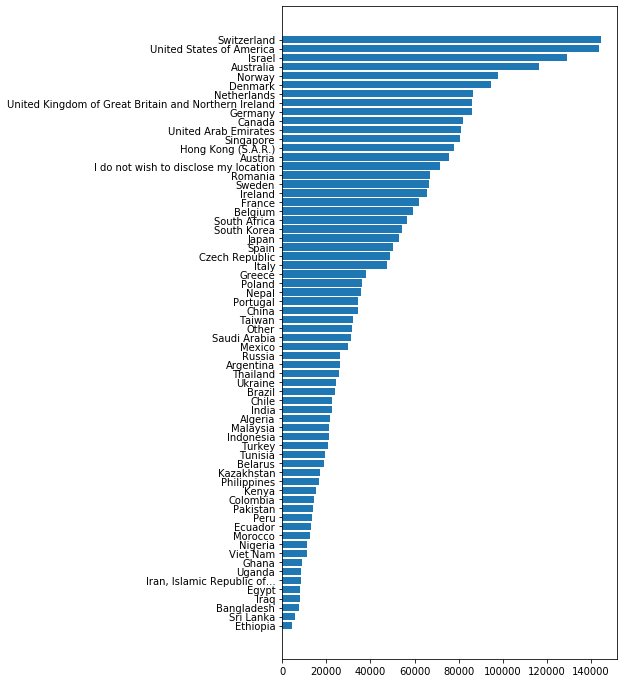

In [45]:
plt.figure(figsize=(6, 12))
plt.barh(country_mean_df.index.values, country_mean_df['Salary'])

# 1.3 Age vs. mean Salary

In [38]:
age_mean = feature.groupby('Age')['Salary'].mean()
age_mean_df = pd.DataFrame(age_mean)
age_mean_df.sort_values(by=['Salary'], ascending = True, inplace = True)
age_mean_df

,Salary
Age,
18-21,15722.878625
22-24,19918.738050
25-29,29213.910355
30-34,47932.025895
35-39,59316.265060
40-44,67760.798429
50-54,82304.677623
45-49,82403.593339
60-69,87435.022026


<BarContainer object of 11 artists>

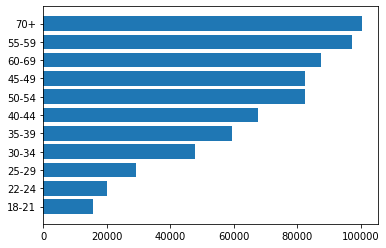

In [39]:
plt.barh(age_mean_df.index.values, age_mean_df['Salary'])

# 1.4 Education vs. mean Salary

In [47]:
edu_mean = feature.groupby('Education')['Salary'].mean()
edu_mean_df = pd.DataFrame(edu_mean)
edu_mean_df.sort_values(by=['Salary'], ascending = True, inplace = True)
edu_mean_df

,Salary
Education,
I prefer not to answer,34191.616766
Bachelor’s degree,35578.291815
No formal education past high school,38208.333333
Some college/university study without earning a bachelor’s degree,41990.616622
Master’s degree,52706.868657
Professional doctorate,67465.517241
Doctoral degree,70641.181777


<BarContainer object of 7 artists>

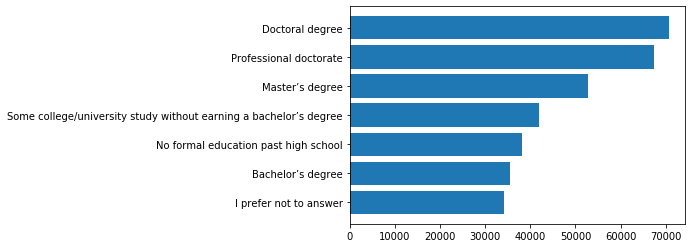

In [48]:
plt.barh(edu_mean_df.index.values, edu_mean_df['Salary'])

# 1.5 professional experience vs. mean Salary

In [50]:
exp_mean = feature.groupby('Professional Experience')['Salary'].mean()
exp_mean_df = pd.DataFrame(exp_mean)
exp_mean_df.sort_values(by=['Salary'], ascending = True, inplace = True)
exp_mean_df

,Salary
Professional Experience,
< 1 years,22604.141291
I have never written code,27651.404787
1-3 years,27763.885126
3-5 years,40831.369362
5-10 years,62156.716418
10-20 years,83355.904659
20+ years,105358.682266


<BarContainer object of 7 artists>

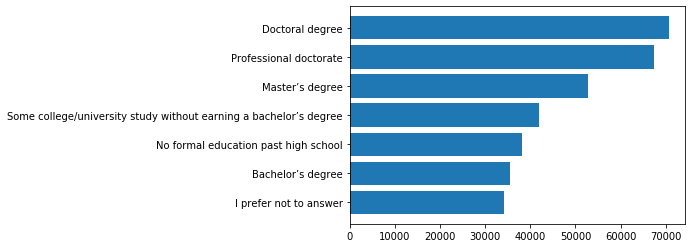

In [51]:
plt.barh(edu_mean_df.index.values, edu_mean_df['Salary'])

# 1.6 professional experience vs. mean Salary

In [52]:
Gender_mean = feature.groupby('Gender')['Salary'].mean()
Gender_mean_df = pd.DataFrame(Gender_mean)
Gender_mean_df.sort_values(by=['Salary'], ascending = True, inplace = True)
Gender_mean_df

,Salary
Gender,
Woman,34816.881547
Man,51193.600696
Prefer to self-describe,74166.666667
Prefer not to say,75765.306122
Nonbinary,121478.723404


<BarContainer object of 5 artists>

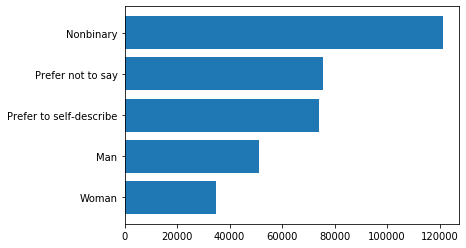

In [54]:
plt.barh(Gender_mean_df.index.values, Gender_mean_df['Salary'])

# Question 2
Estimating the difference between average salary (Q25) of men vs. women (Q2). 

#2.1 Compute and report descriptive statistics for each group (remove missing data, if 
necessary). 

In [56]:
#clean the data and remove missing data by filter
man_salary = feature[feature['Gender'] == 'Man']
woman_salary = feature[feature['Gender'] == 'Woman']
man_salary

,Age,Gender,Country,Education,Professional Experience,Salary
0,50-54,Man,India,Bachelor’s degree,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,20+ years,40000
4,45-49,Man,India,Doctoral degree,< 1 years,40000
5,30-34,Man,India,Bachelor’s degree,5-10 years,20000
6,30-34,Man,Turkey,I prefer not to answer,1-3 years,1000
7,40-44,Man,Australia,Doctoral degree,1-3 years,80000
8,45-49,Man,Nigeria,Master’s degree,5-10 years,3000
9,22-24,Man,Nigeria,Bachelor’s degree,< 1 years,1000


In [62]:
#basic stat
gender_stat = pd.DataFrame()
gender_stat['man salary'] = man_salary.describe()['Salary']
gender_stat['woman salary'] = woman_salary.describe()['Salary']
gender_stat

,man salary,woman salary
count,12642.000000,2482.000000
mean,51193.600696,34816.881547
std,99979.274378,72017.347888
min,1000.000000,1000.000000
25%,2000.000000,1000.000000
50%,20000.000000,7500.000000
75%,60000.000000,50000.000000
max,1000000.000000,1000000.000000


In [64]:
# Addintinal Skewness, Kurtosis and Varianc
print('\t\t Man_Salary \t\t Woman_Salary')
print("Skewness:\t %f \t\t %f" % (man_salary['Salary'].skew(), woman_salary['Salary'].skew()))
print("Kurtosis:\t %f \t\t %f" % (man_salary['Salary'].kurt(), woman_salary['Salary'].kurt()))
print("Variance:\t %f \t %f" % (man_salary['Salary'].var(), woman_salary['Salary'].var()))
print("Mode:\t\t %f \t\t %f" % (man_salary['Salary'].mode(), woman_salary['Salary'].mode()))

		 Man_Salary 		 Woman_Salary
Skewness:	 6.044274 		 7.162399
Kurtosis:	 49.612179 		 81.337681
Variance:	 9995855305.142775 	 5186498396.881648
Mode:		 1000.000000 		 1000.000000


#2.2 If  suitable,  perform  a  two-sample  t-test  with  a  0.05  threshold.  Explain  your 
rationale. 

In [81]:
#make the null hypothesis and alternative hypothesis 
print('H0: Man average salary is equal to woman average salary')
print('H1: Man average salary is not eqaul to woman average salary')

# find the t-test value and p-value
t_stat, p_value = stats.ttest_ind(man_salary['Salary'], woman_salary['Salary'])
print ("t-test: t = %g  p = %g" % (t_stat, p_value))

if p_value <= 0.05:
    print("The difference in means is significant with p-value =", p_value)
else:
    print("The difference in means is not significant with p-value =", p_value)
    
print("Since P is lower than 0.5, man average salary is not equal to woman average salary")

H0: Man average salary is equal to woman average salary
H1: Man average salary is not eqaul to woman average salary
t-test: t = 7.77406  p = 8.08881e-15
The difference in means is significant with p-value = 8.088812859676161e-15
Since P is lower than 0.5, man average salary is not equal to woman average salary


#2.3 Bootstrap your data for comparing the mean of salary (Q25) for the two groups. 
Note  that the  number  of instances  you  sample  from  each  group  should  be  relative  to its 
size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and 
the distribution of the difference in means. 

In [86]:
#set basic parameters
man_salary_list = man_salary['Salary'].values
woman_salary_list = woman_salary['Salary'].values
bst_man=[]
bst_woman=[]
bst_mean=[]
n_samples=1000


#bootstrap
for i in range(n_samples):
    #sample
    bstsample_man = np.random.choice(man_salary_list, size=1000, replace=True)
    bstsample_woman = np.random.choice(woman_salary_list, size=1000, replace=True)
    
    #mean distribution
    bst_man.append(np.mean(bstsample_man))
    bst_woman.append(np.mean(bstsample_woman))
    bst_mean.append(np.mean(bstsample_man)-np.mean(bstsample_woman))

Text(0.5, 1.0, 'Salary Bootstrapped Distribution of Difference in Mean for \nMan and Woman (1000 Replications)')

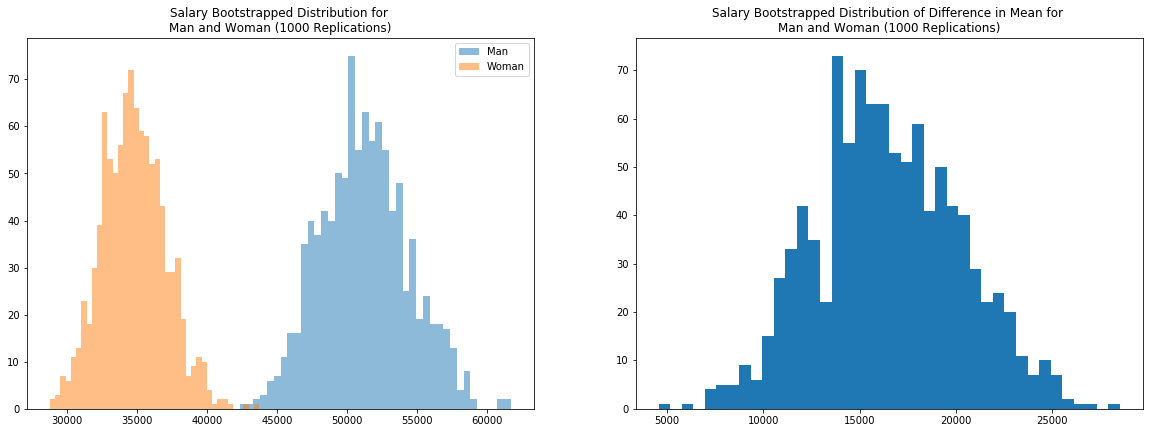

In [87]:
#mean distribution plot
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.hist(bst_man, bins = 40,alpha=0.5)
plt.hist(bst_woman, bins = 40,alpha=0.5)
plt.title('Salary Bootstrapped Distribution for \nMan and Woman (1000 Replications)')
plt.legend(['Man', 'Woman'])

#difference plot 
plt.subplot(2,2,2)
plt.hist(bst_mean, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean for \nMan and Woman (1000 Replications)')


#2.4 If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped 
data. Explain your rationale. 

In [82]:
#make the null hypothesis and alternative hypothesis 
print('H0: Man bootstrap average salary is equal to woman bootstrap average salary')
print('H1: Man bootstrap average salary is not eqaul to woman bootstrap average salary')

# find the t-test value and p-value
t_stat, p_value = stats.ttest_ind(bstsample_man, bstsample_woman)
print ("t-test: t = %g  p = %g" % (t_stat, p_value))

if p_value <= 0.05:
    print("The difference in means is significant with p-value =", p_value)
else:
    print("The difference in means is not significant with p-value =", p_value)
    
print("Since P is lower than 0.5, man average salary is not equal to woman average salary")

H0: Man bootstrap average salary is equal to woman bootstrap average salary
H1: Man bootstrap average salary is not eqaul to woman bootstrap average salary
t-test: t = 5.89472  p = 4.39507e-09
The difference in means is significant with p-value = 4.395066606030412e-09
Since P is lower than 0.5, man average salary is not equal to woman average salary


#2.5 Comment on your findings. 

We can find that the woman have mean salary of 51193, and man have mean salary of 34816. For the population mean diff, we reject the null hypothesis and for the bootstrap sample, we also reject the null hypothesis. Bootstrap could be a efficient way to evaluate the population. 

# Question 3
Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this 
time  use  analysis  of  variance  (ANOVA)  instead  of  t-test  for  hypothesis  testing  to  compare  the 
means  of salary for three groups  (Bachelor’s  degree,  Master’s  degree,  and Doctoral degree) 

#3.1 Compute and report descriptive statistics for each group (remove missing data, if necessary). 

In [98]:
#clean the data and remove missing data by filter
Bachelor_salary = feature[feature['Education'] == 'Bachelor’s degree']
Master_salary = feature[feature['Education'] == 'Master’s degree']
Doctoral_salary = feature[feature['Education'] == 'Doctoral degree']


In [100]:
#basic stat
edu_stat = pd.DataFrame()
edu_stat['bachelor salary'] = Bachelor_salary.describe()['Salary']
edu_stat['master salary'] = Master_salary.describe()['Salary']
edu_stat['doctoral salary'] = Doctoral_salary.describe()['Salary']
edu_stat

,bachelor salary,master salary,doctoral salary
count,4777.000000,6799.000000,2217.000000
mean,35578.291815,52706.868657,70641.181777
std,89382.060777,90928.786678,117160.947589
min,1000.000000,1000.000000,1000.000000
25%,1000.000000,3000.000000,4000.000000
50%,7500.000000,25000.000000,40000.000000
75%,40000.000000,70000.000000,90000.000000
max,1000000.000000,1000000.000000,1000000.000000


In [93]:
# Addintinal Skewness, Kurtosis and Varianc
print('\t\t Bachelor_Salary \t\t Master_Salary \t\t Doctoral_Salary')
print("Skewness:\t %f \t\t\t %f \t\t %f" % (Bachelor_salary['Salary'].skew(), Master_salary['Salary'].skew(), Doctor_salary['Salary'].skew()))
print("Kurtosis:\t %f \t\t\t %f \t\t %f" % (Bachelor_salary['Salary'].kurt(), Master_salary['Salary'].kurt(), Doctor_salary['Salary'].kurt()))
print("Variance:\t %f \t\t %f \t %f" % (Bachelor_salary['Salary'].var(), Master_salary['Salary'].var(), Doctor_salary['Salary'].var()))
print("Mode:\t\t %f \t\t\t %f \t\t %f" % (Bachelor_salary['Salary'].mode(), Master_salary['Salary'].mode(), Doctor_salary['Salary'].mode()))

		 Bachelor_Salary 		 Master_Salary 		 Doctoral_Salary
Skewness:	 7.673007 			 5.832651 		 4.695518
Kurtosis:	 74.466145 			 51.354215 		 30.413531
Variance:	 7989152788.706370 		 8268044246.724630 	 13726687639.938467
Mode:		 1000.000000 			 1000.000000 		 1000.000000


#3.2 If suitable, use analysis of variance (ANOVA) for hypothesis testing to compare the means of salary for three groups. Explain your rationale.

In [114]:
# Perform the ANOVA
f_val, p_val = stats.f_oneway(Bachelor_salary['Salary'], Master_salary['Salary'], Doctoral_salary['Salary'])
print ("ANOVA test: t = %g  p = %g" % (f_val, p_val))

# Check the p-value against the threshold
if p_val < 0.05:
    print("p < 0.05, so the means of the groups are significantly different.")
else:
    print("p > 0.05, so the means of the groups are not significantly different.")

ANOVA test: t = 109.758  p = 5.1077e-48
p < 0.05, so the means of the groups are significantly different.


#3.3. Bootstrap your data for comparing the mean of salary for the three groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions and the distribution of the difference in means.

In [111]:
#set basic parameters
bachelor_salary_list = Bachelor_salary['Salary'].values
master_salary_list = Master_salary['Salary'].values
doctoral_salary_list = Doctoral_salary['Salary'].values

bst_bachelor=[]
bst_master=[]
bst_doctoral=[]

bst_diff_bm=[]
bst_diff_bd=[]
bst_diff_md=[]

n_samples=1000


#bootstrap
for i in range(n_samples):
    #sample
    bstsample_bachelor = np.random.choice(bachelor_salary_list, size=1000, replace=True)
    bstsample_master = np.random.choice(master_salary_list, size=1000, replace=True)
    bstsample_doctoral = np.random.choice(doctoral_salary_list, size=1000, replace=True)
    
    #mean distribution
    bst_bachelor.append(np.mean(bstsample_bachelor))
    bst_master.append(np.mean(bstsample_master))
    bst_doctoral.append(np.mean(bstsample_doctoral))
    
    #mean diff distribution
    bst_diff_bm.append(np.mean(bstsample_master)-np.mean(bstsample_bachelor))
    bst_diff_bd.append(np.mean(bstsample_doctoral)-np.mean(bstsample_bachelor))
    bst_diff_md.append(np.mean(bstsample_doctoral)-np.mean(bstsample_master))
    

Text(0.5, 1.0, 'Salary Bootstrapped Distribution of Difference in Mean between master and doctoral (1000 Replications)')

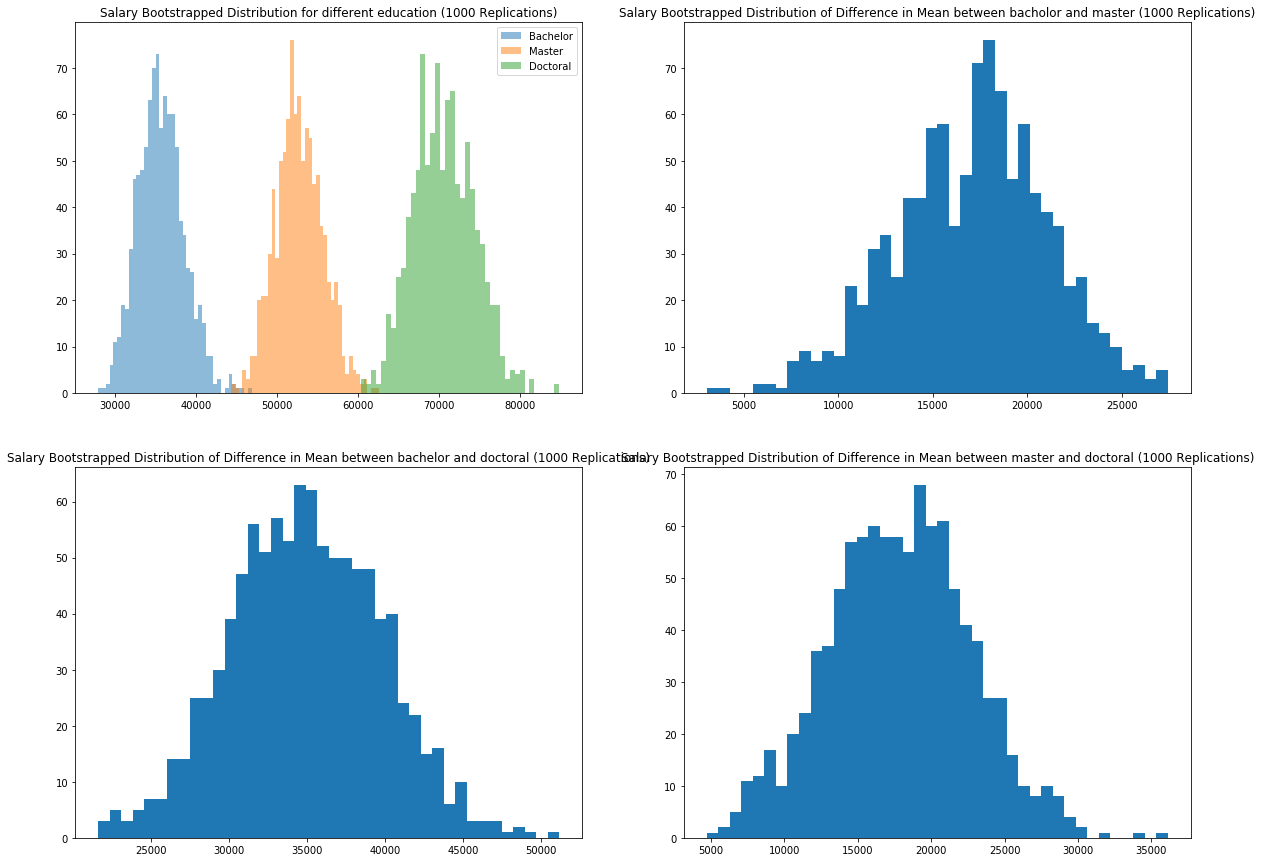

In [112]:
#mean distribution plot
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.hist(bst_bachelor, bins = 40,alpha=0.5)
plt.hist(bst_master, bins = 40,alpha=0.5)
plt.hist(bst_doctoral, bins = 40,alpha=0.5)
plt.title('Salary Bootstrapped Distribution for different education (1000 Replications)')
plt.legend(['Bachelor', 'Master','Doctoral'])

#difference plot 
plt.subplot(2,2,2)
plt.hist(bst_diff_bm, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean between bacholor and master (1000 Replications)')

plt.subplot(2,2,3)
plt.hist(bst_diff_bd, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean between bachelor and doctoral (1000 Replications)')

plt.subplot(2,2,4)
plt.hist(bst_diff_md, bins = 40)
plt.title('Salary Bootstrapped Distribution of Difference in Mean between master and doctoral (1000 Replications)')



#2.4 If suitable, perform an Anova test with a 0.05 threshold on the bootstrapped 
data. Explain your rationale. 

In [115]:
#make the null hypothesis and alternative hypothesis 
print('H0: education do not have effect on the salary level, which means there is no significant salary difference between bachelor, master and doctor')
print('H1: education do have effect on the salary level, which means there is significant salary difference between bachelor,master and doctor')

# find the t-test value and p-value
f_val, p_val = stats.f_oneway(bstsample_bachelor, bstsample_master, bstsample_doctoral)
print ("ANOVA test: t = %g  p = %g" % (f_val, p_val))

if p_value <= 0.05:
    print("The difference in means is significant with p-value =", p_value)
else:
    print("The difference in means is not significant with p-value =", p_value)
    
print("Since P is lower than 0.5, there is significant salary difference between different ")

H0: education do not have effect on the salary level, which means there is no significant salary difference between bachelor, master and doctor
H1: education do have effect on the salary level, which means there is significant salary difference between bachelor,master and doctor
ANOVA test: t = 31.0317  p = 4.57881e-14
The difference in means is significant with p-value = 4.395066606030412e-09
Since P is lower than 0.5, there is significant salary difference between different 


#2.5 Comment on your findings. 

statistical mean summary:
    Bachelor’s degree	35578.291815
    Master’s degree	    52706.868657
    Doctoral degree	    70641.181777
The result of ANOVA test is t = 109.758  p = 5.1077e-48
The result of bootstrap ANOVA test is  t = 31.0317  p = 4.57881e-14
Both of them reject the null hypothesis, and get the same conclusion.
